# Image Classification Using CNN  by Hk

## 1. Setup

### 1.1 Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

### 1.2 Assigning Path for Dataset

In [2]:
data_dir = '../input/gtsrb-german-traffic-sign'
train_path = '../input/gtsrb-german-traffic-sign/Train'
test_path = '../input/gtsrb-german-traffic-sign/'

### 1.3 Resizing the images to 32x32x3

In [3]:
IMG_HEIGHT = 32
IMG_WIDTH = 32
channels = 3

### 1.4 Finding Total Classes

In [4]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

### 1.5 Label Overview

In [5]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## 2. Visualizing The Dataset

### 2.1 Listing Directory Contents

In [6]:
folders = os.listdir(train_path)

### 2.2 Initializing Lists

In [7]:
train_number = []
class_num = []

### 2.3 Iterating Over Folders:

For each folder in the folders list, the code performs the following:

* Lists all files in the current folder (train_files).
* Appends the number of files in this folder to train_number.
* Converts the folder name to an integer and uses it to index a classes array, appending the result to class_num. The classes array is not defined in this snippet but presumably maps folder names to class numbers.

In [8]:
for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    

### 2.4 Sorting by Number of Images

Here, the script sorts the classes based on the number of images in each class:

* It first zips train_number and class_num together and sorts this zipped list.
* Then, it unzips the sorted pairs back into two separate lists, train_number and class_num, now ordered by the number of images per class.

In [9]:
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

### 2.5 Plotting the Data

Finally, the script uses matplotlib to create a bar chart:

* It sets the figure size to 21x10.
* It plots a bar chart with class numbers on the x-axis and the number of images on the y-axis.
* The class numbers on the x-axis are rotated vertically for better readability.
* The chart is displayed with plt.show().

#### 2.5.1 Train Data

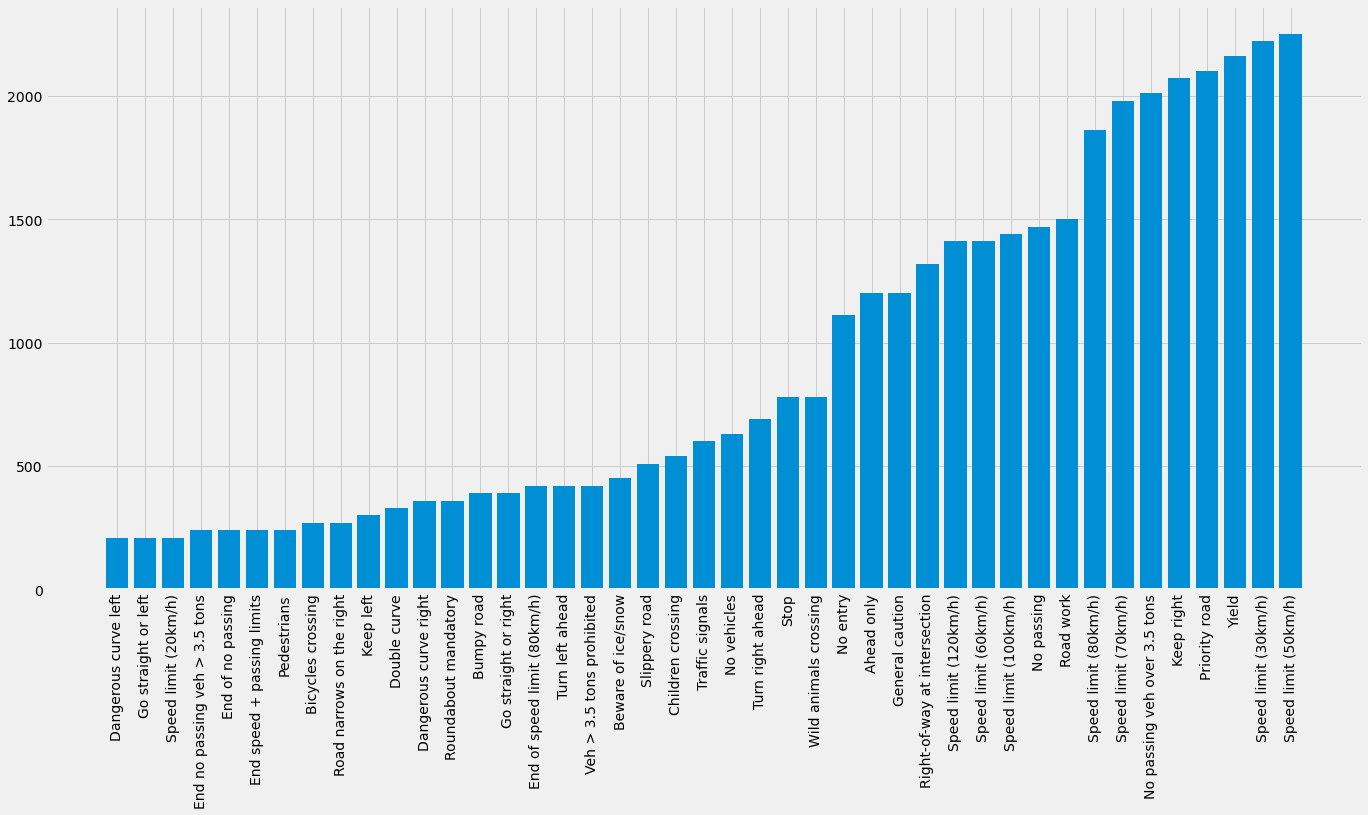

In [10]:
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

#### 2.5.2 Test Data

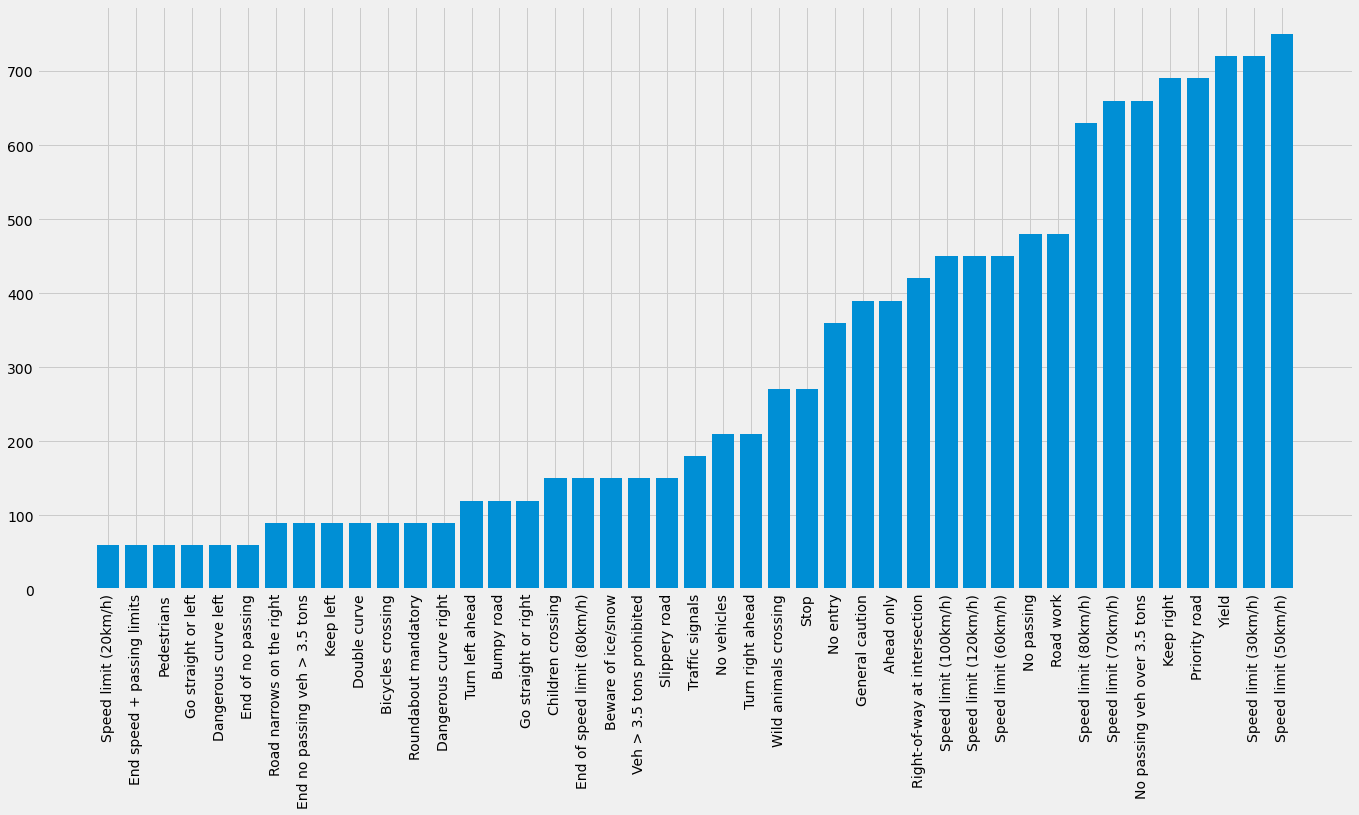

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the path for the test dataset CSV file
test_csv_path = '../input/gtsrb-german-traffic-sign/Test.csv'

# Read the test.csv file
test_data = pd.read_csv(test_csv_path)

# Count the occurrences of each class and sort them by the number of occurrences
test_class_distribution = test_data['ClassId'].value_counts().sort_values()

# Mapping class IDs to their names using the provided dictionary
class_names = [classes[class_id] for class_id in test_class_distribution.index]

# Get the counts for each class
counts = test_class_distribution.values

# Plot the bar chart
plt.figure(figsize=(21, 10))
plt.bar(class_names, counts)
plt.xticks(rotation='vertical')
plt.show()




### 2.6 Target class visualization

The images are not part of the dataset; they are simply photographs of signs. There may be differences between them and the dataset samples, as the dataset includes images of German traffic signs, while the pictures shown below are of Ukrainian traffic signs.

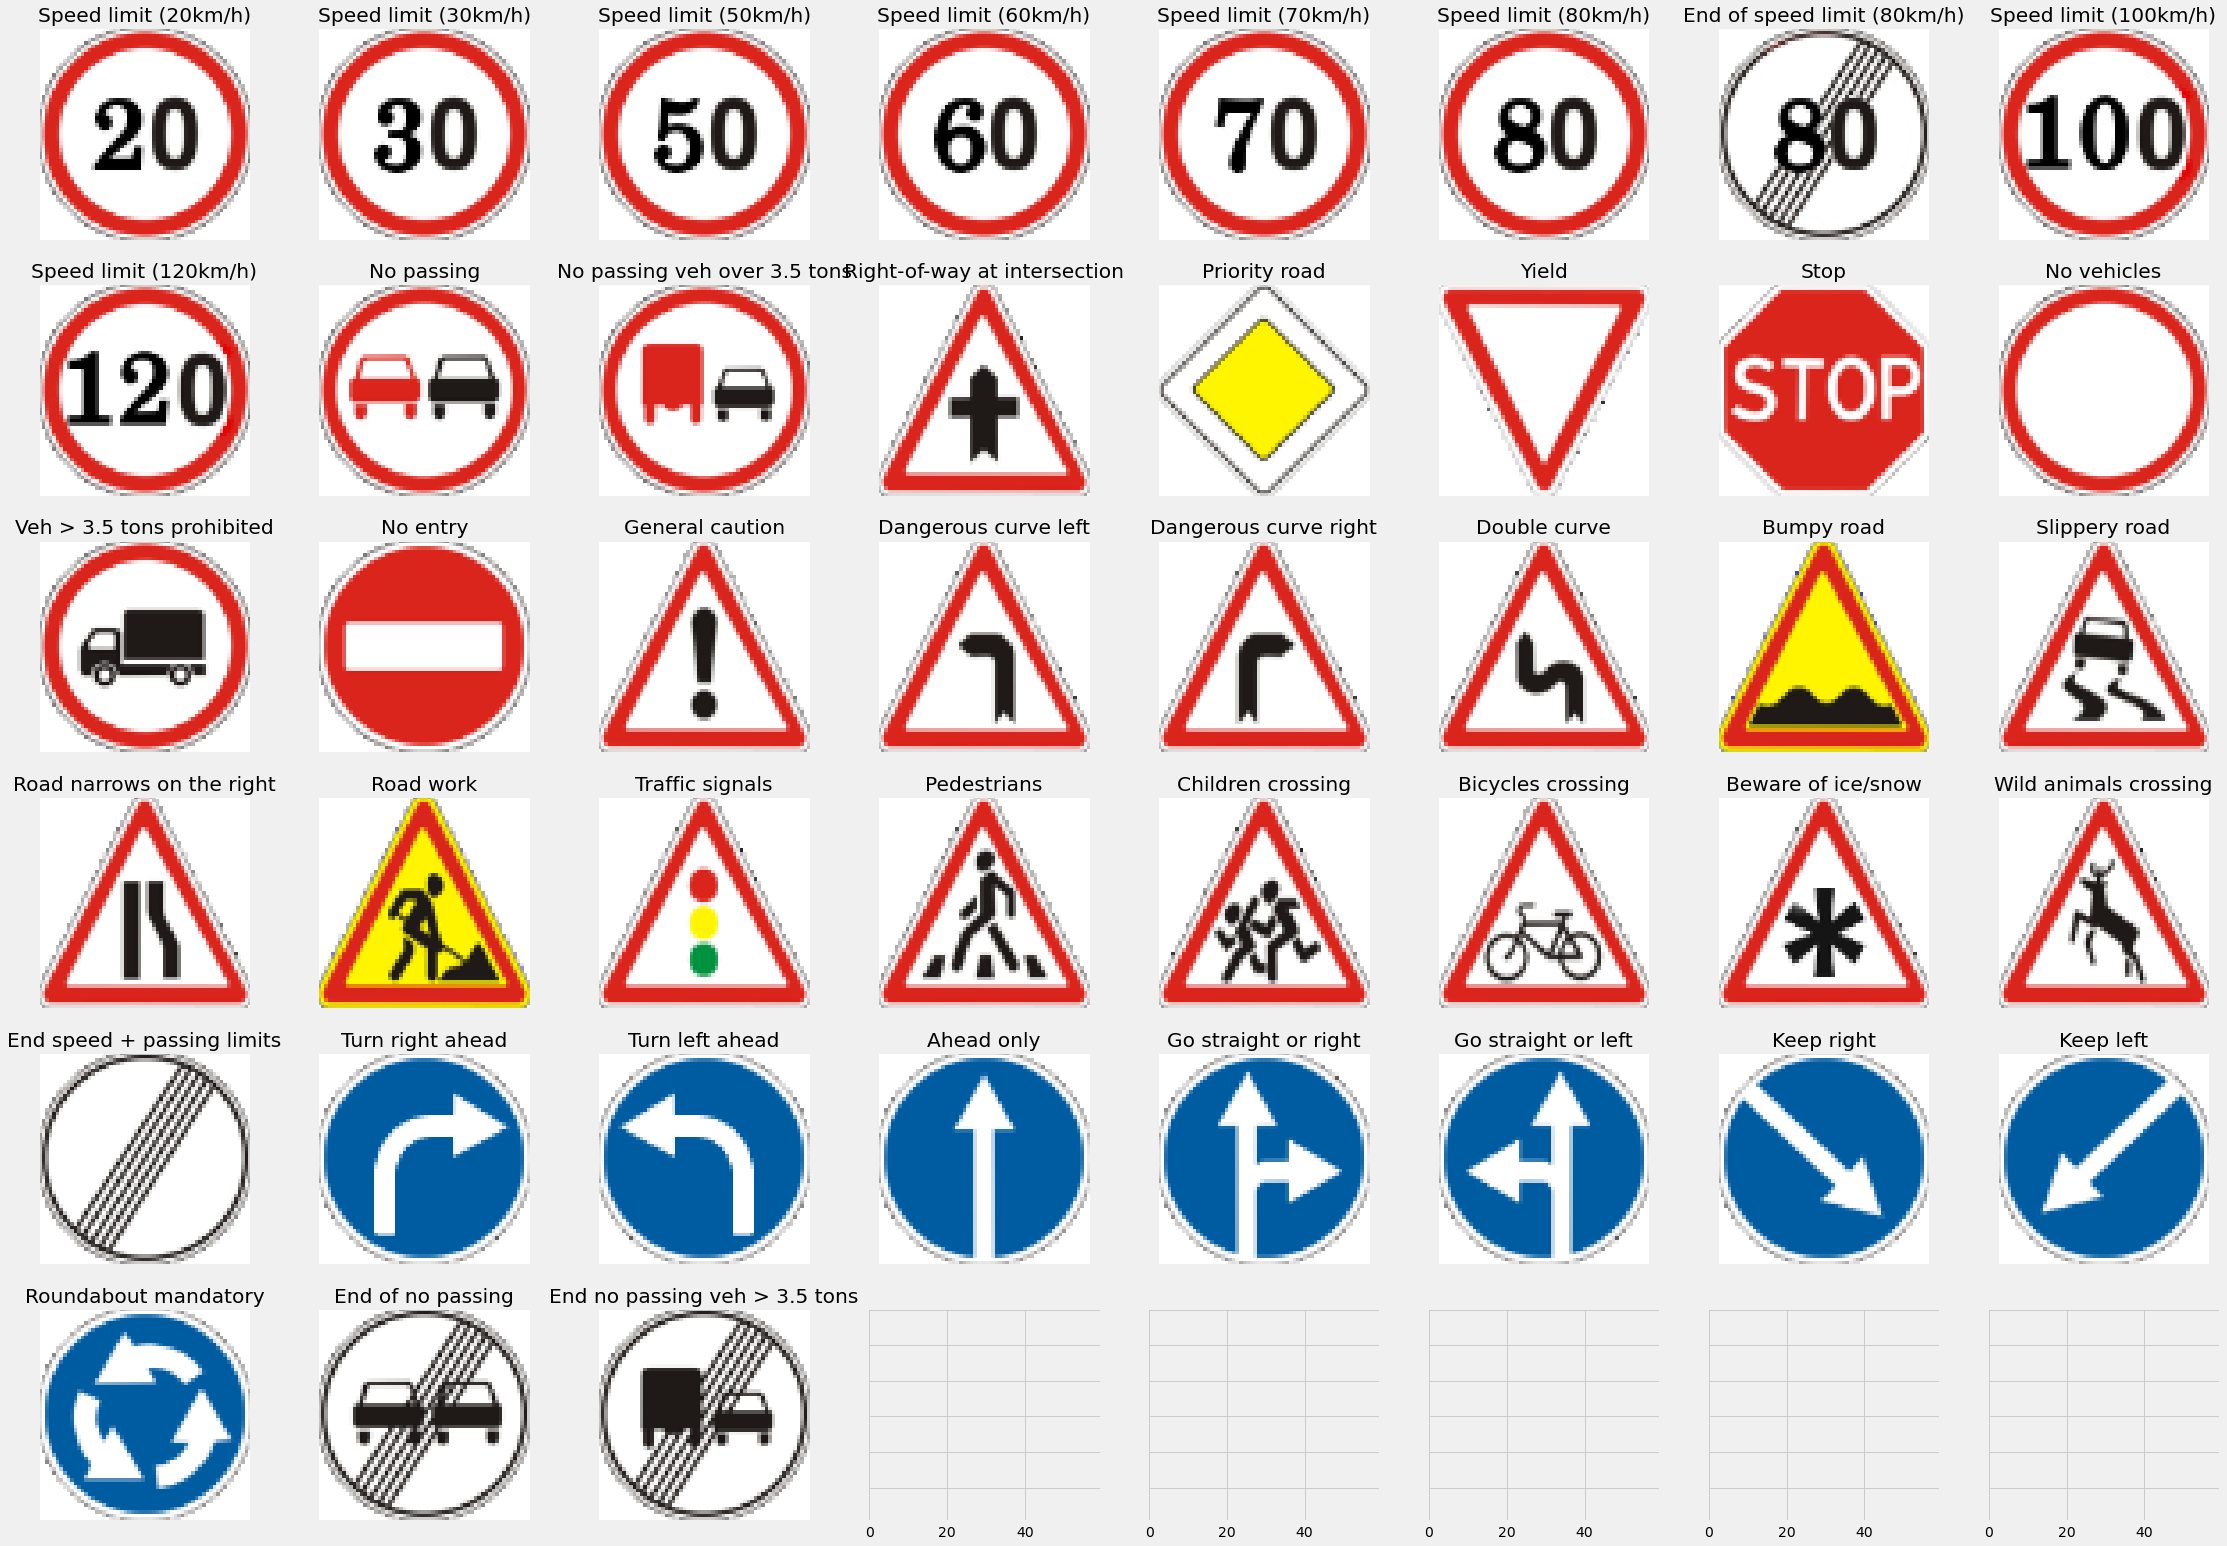

In [12]:
import seaborn as sns
meta_info = os.path.join(data_dir, 'Meta.csv')
metaDf = pd.read_csv(meta_info)
metaDf['Path'] = list(map(lambda x: os.path.join(data_dir,x.lower()), metaDf['Path']))

sns.set_style()
rows = 6
cols = 8
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(35, 25))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=None)
metaDf = metaDf.sort_values(by=['ClassId'])

idx = 0
for i in range(rows):
    for j in range(cols):
        if idx > 42:
            break
            
        img = cv2.imread(metaDf["Path"].tolist()[idx], cv2.IMREAD_UNCHANGED)
        img[np.where(img[:,:,3]==0)] = [255,255,255,255]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (60,60))
        
        axs[i,j].imshow(img)
        axs[i,j].set_facecolor('xkcd:salmon')
        axs[i,j].set_facecolor((1.0, 0.47, 0.42))
        axs[i,j].set_title(classes[int(metaDf["ClassId"].tolist()[idx])])
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        idx += 1

### 2.7 Distribution of Image Sizes

The dataset comprises thousands of images, varying in resolution. These images range from large to small, necessitating a decision on the optimal resolution for samples. Multivariate plotting is an effective method for visualizing the correlation between width and height.

From the data presented below, it's evident that the majority of images hover around the 35x35 pixel size, with only a handful reaching larger dimensions, such as 100x100 pixels.

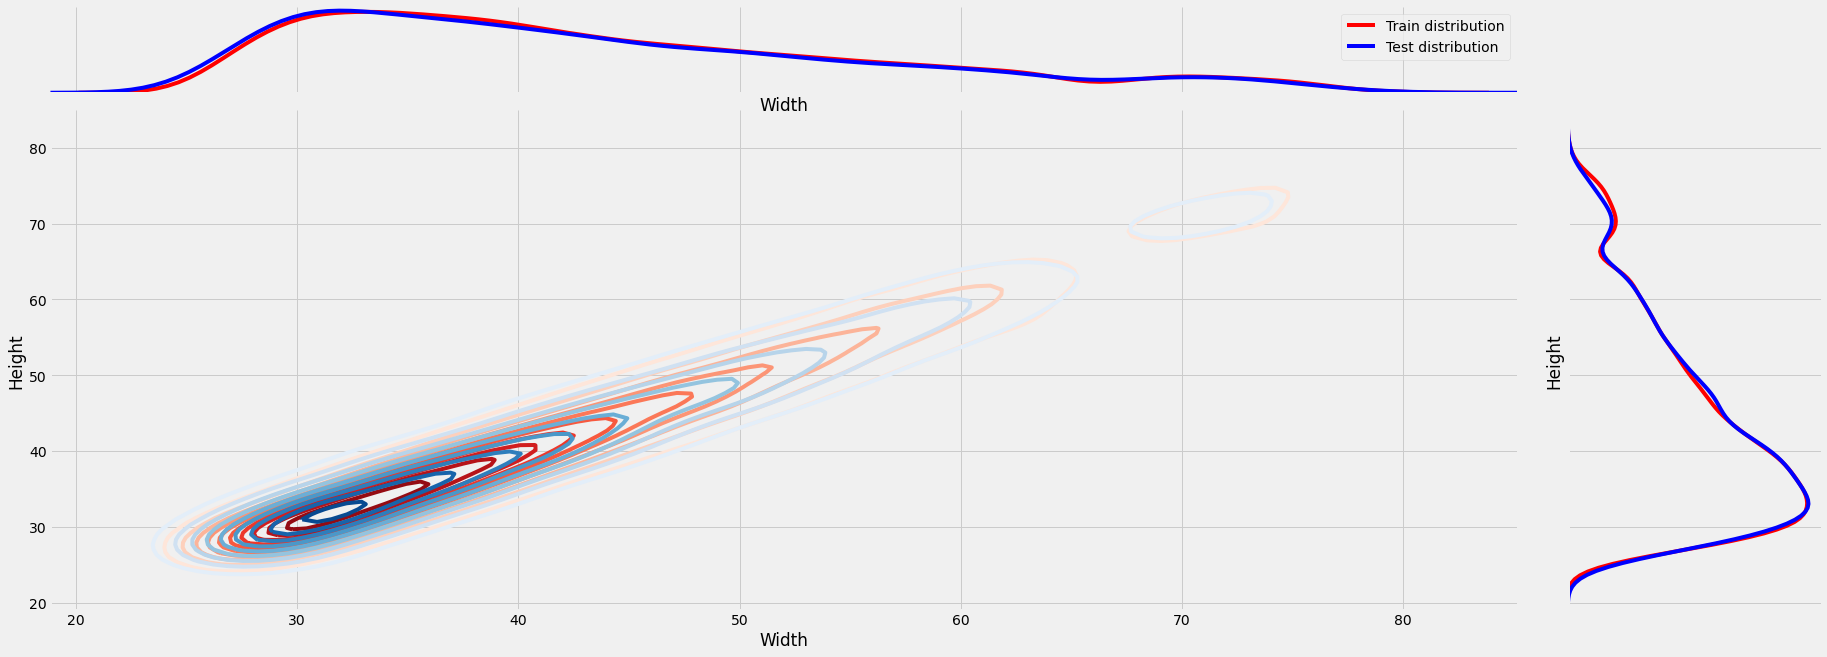

In [13]:
train_csv_path = os.path.join(data_dir, 'Train.csv')
trainDf = pd.read_csv(train_csv_path)
test_csv_path = os.path.join(data_dir, 'Test.csv')
testDf = pd.read_csv(test_csv_path)

trainDfDpiSubset = trainDf[(trainDf.Width < 80) & (trainDf.Height < 80)];
testDfDpiSubset = testDf[(testDf.Width < 80) & (testDf.Height < 80)];

g = sns.JointGrid(x="Width", y="Height", data=trainDfDpiSubset)
sns.kdeplot(trainDfDpiSubset.Width, trainDfDpiSubset.Height, cmap="Reds",
        shade=False, shade_lowest=False, ax=g.ax_joint)
sns.kdeplot(testDfDpiSubset.Width, testDfDpiSubset.Height, cmap="Blues",
        shade=False, shade_lowest=False, ax=g.ax_joint)
sns.distplot(trainDfDpiSubset.Width, kde=True, hist=False, color="r", ax=g.ax_marg_x, label='Train distribution')
sns.distplot(testDfDpiSubset.Width, kde=True, hist=False, color="b", ax=g.ax_marg_x, label='Test distribution')
sns.distplot(trainDfDpiSubset.Width, kde=True, hist=False, color="r", ax=g.ax_marg_y, vertical=True)
sns.distplot(testDfDpiSubset.Height, kde=True, hist=False, color="b", ax=g.ax_marg_y, vertical=True)
g.fig.set_figwidth(30)
g.fig.set_figheight(10)
plt.show();

### 2.8 Visualizing 25 Random Images from Test Data

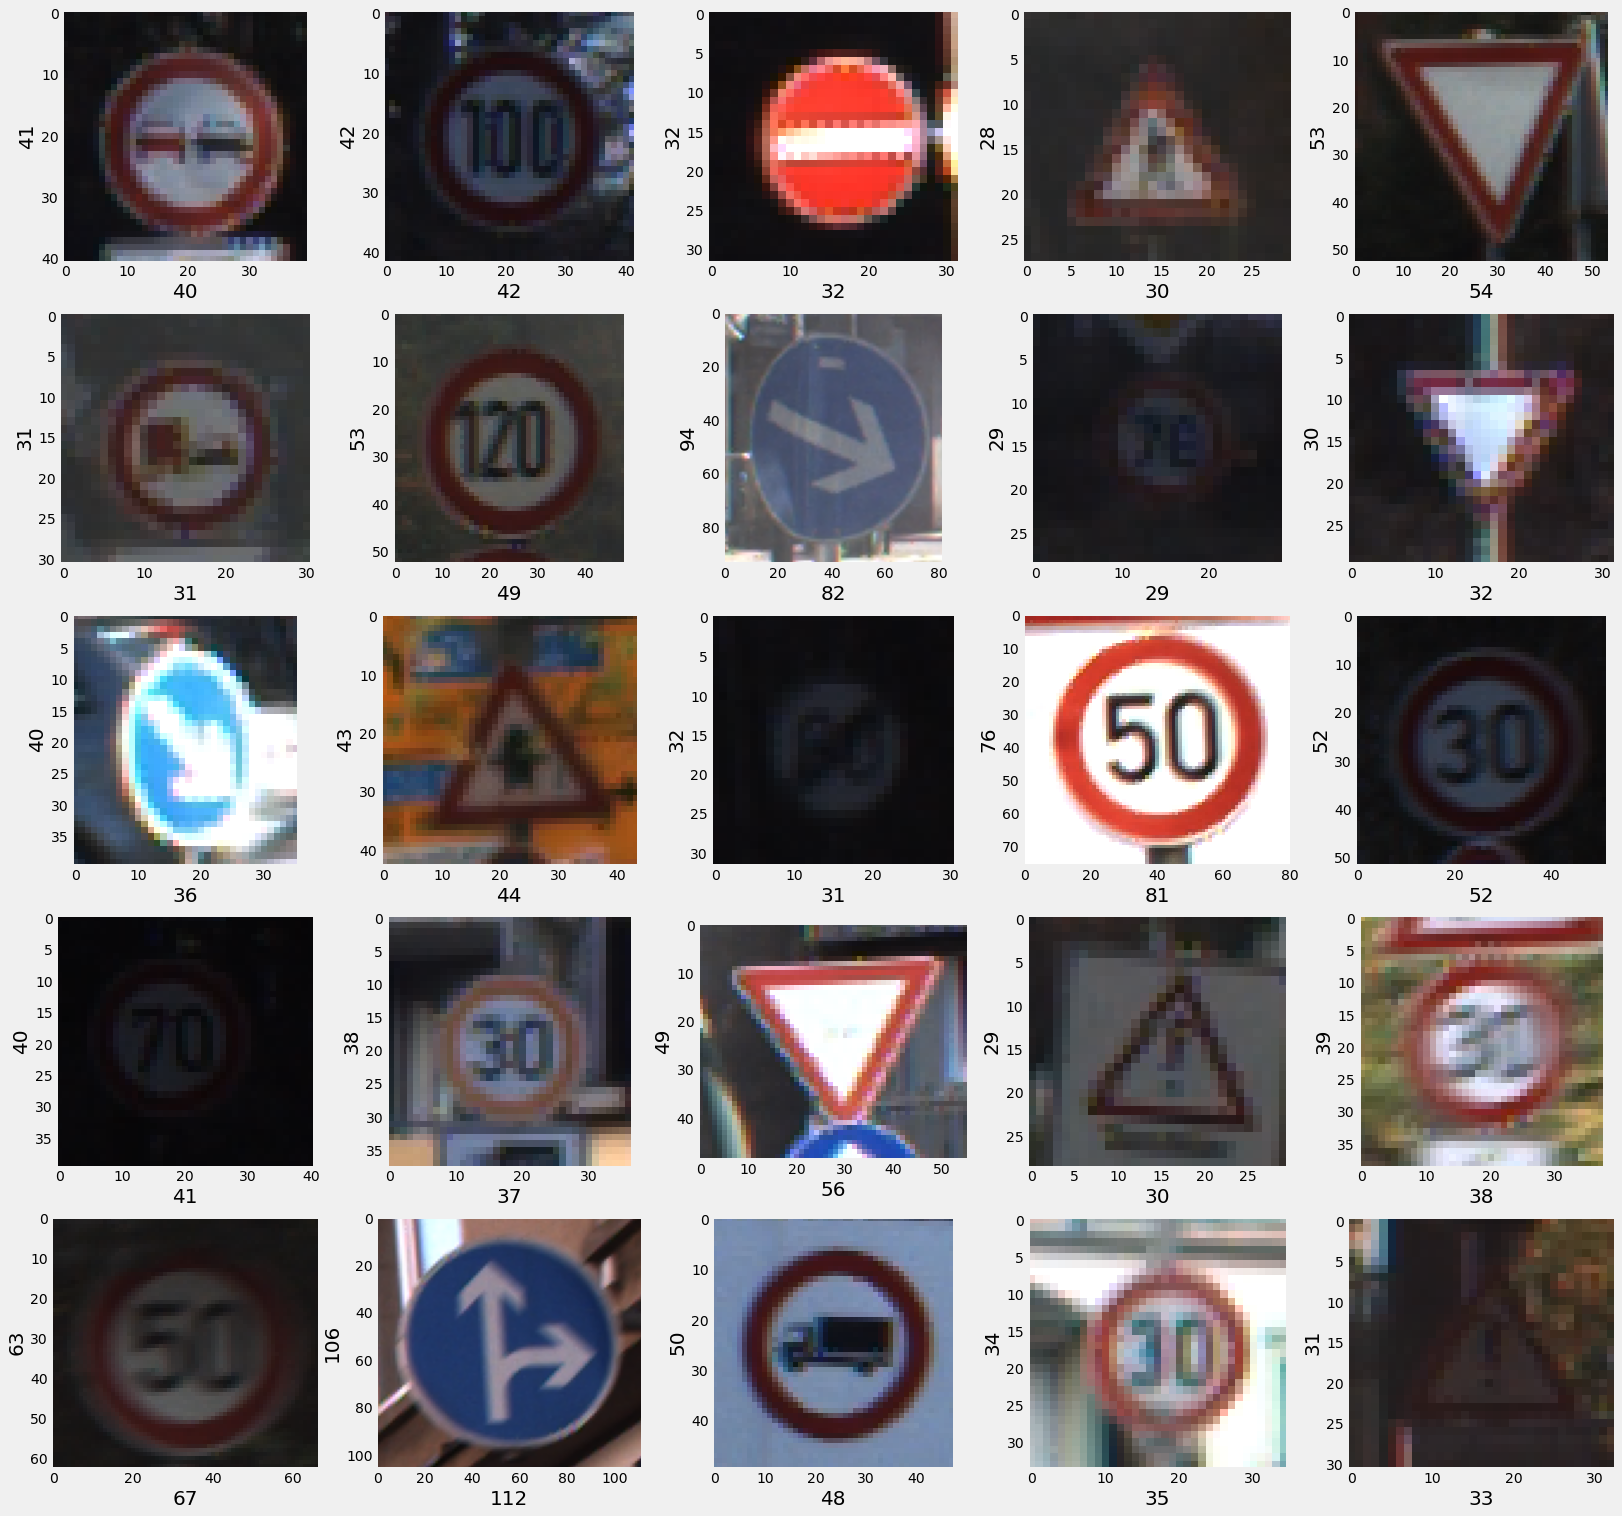

In [14]:
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

## 3. Collecting the Data

### 3.1 Training Data

#### 3.1.1 Initializing Lists

In [15]:
image_data = []
image_labels = []

#### 3.1.2 Iterating Over Categories and Processing Each Image

The code iterates over a number of categories defined by NUM_CATEGORIES. For each category, it:

* Constructs a path string to the directory containing images for that category.
* Lists all image files in this directory.

For each image in the category, the code tries to:

* Read the image using OpenCV (cv2.imread).
* Convert the image to an RGB format (Image.fromarray with 'RGB').
* Resize the image to a specified height and width (IMG_HEIGHT, IMG_WIDTH).
* Append the processed image data (as a NumPy array) to image_data.
* Append the category label (i) to image_labels.
* If an error occurs during this process, it prints an error message with the image name.

In [16]:
for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

#### 3.1.3 Converting Lists to NumPy Arrays

The lists image_data and image_labels are converted to NumPy arrays. This is a common practice in machine learning to facilitate efficient computations and easier integration with ML libraries.

In [17]:
image_data = np.array(image_data)
image_labels = np.array(image_labels)

#### 3.1.4 Printing Shapes of Arrays

Finally, the code prints the shapes of the image_data and image_labels arrays. This step is often used to verify the dimensions of the data, ensuring that the dataset has been correctly structured for input into a machine learning model.

In [18]:
print(image_data.shape, image_labels.shape)

(39209, 32, 32, 3) (39209,)


### 3.2 Shuffling the Training Data

The purpose of this process is to randomize the order of the data to reduce overfitting.

* The first line creates an array of indexes using np.arange(). The size of the array is equal to the number of images in image_data.
* In the second line, the NumPy function np.random.shuffle() randomly shuffles these indexes. This shuffling is done "in place," meaning the shuffle_indexes array is modified directly.
* Finally, the code uses the shuffled indexes to reorder both the image_data and image_labels arrays. This means that each image and its corresponding label are reordered in the same way according to the shuffled indexes.

In [19]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

### 3.3 Splitting the Data into Train and Validation Set

* The function train_test_split() from a library (likely scikit-learn) is used to split the image_data and image_labels into training and validation sets.
* test_size=0.3 indicates that 30% of the data will be used as the validation set (X_val, y_val), and the remaining 70% will be the training set (X_train, y_train).
* random_state=42 ensures reproducibility of the split; the same split will occur every time the code is run.
* shuffle=True means the data will be shuffled before splitting. This is usually done to ensure the data is randomly distributed.

Line 2 and 3 normalize the image data. Since RGB color values range from 0 to 255, dividing by 255 scales these values to a range of 0 to 1.

Finally, the shapes of the training and validation datasets are printed.
* X_train.shape and X_val.shape give the dimensions of the image datasets (number of images, image height, image width, and number of channels).
* y_train.shape and y_val.shape give the dimensions of the label datasets, which typically indicate the number of labels corresponding to the training and validation images.

In [20]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27446, 32, 32, 3)
X_valid.shape (11763, 32, 32, 3)
y_train.shape (27446,)
y_valid.shape (11763,)


### 3.4 One hot encoding the labels


This code snippet is used for converting the training and validation label sets (y_train and y_val) into a one-hot encoded format.

* One-hot encoding transforms integer labels into a binary matrix representation. For example, in a classification problem with three classes (0, 1, 2), the integer label 1 would be converted to [0, 1, 0].
* NUM_CATEGORIES specifies the total number of categories or classes in the dataset. This ensures that each one-hot encoded vector has a length equal to NUM_CATEGORIES.

In [21]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


## 4. Making the model

This code snippet defines a convolutional neural network (CNN) using Keras, a high-level neural networks API. The CNN is structured using the `Sequential` model, which is a linear stack of layers. Here's a breakdown of its architecture:

1. **Convolutional Layers**:
   - The first layer is a `Conv2D` layer with 16 filters, a kernel size of (3,3), `relu` activation, and an `input_shape` defined by `(IMG_HEIGHT, IMG_WIDTH, channels)`. This layer is responsible for extracting features from the input images.
   - Another `Conv2D` layer follows, with 32 filters and a kernel size of (3,3), also using `relu` activation. This layer further processes the features extracted by the previous layer.
   - The model then includes two more `Conv2D` layers, one with 64 filters and the other with 128 filters, both with (3,3) kernel size and `relu` activation. These layers continue the feature extraction process.

2. **Pooling and Normalization**:
   - After the first two and the last two convolutional layers, there are `MaxPool2D` layers with a pool size of (2,2). These layers reduce the spatial dimensions (height and width) of the feature maps, effectively downsampling the input feature maps to reduce the number of parameters and computation in the network.
   - `BatchNormalization` layers are used after each set of pooling layers (and also after the dense layer later). These layers normalize the inputs to the next layer, which helps in speeding up the training and reducing the sensitivity to network initialization.

3. **Flattening and Dense Layers**:
   - The `Flatten` layer is used to flatten the 3D output of the previous layers into a 1D array. It's necessary because the following dense layers expect 1D input.
   - A `Dense` layer with 512 units and `relu` activation follows, serving as a fully connected layer that processes the flattened features.
   - This is followed by another `BatchNormalization` layer and a `Dropout` layer with a rate of 0.5. The dropout layer randomly sets input units to 0 at each step during training, which helps prevent overfitting.

4. **Output Layer**:
   - The final layer is a `Dense` layer with 43 units (corresponding to the number of classes) and `softmax` activation. This layer outputs a probability distribution over the 43 classes, with each neuron representing the probability that the input belongs to one of the classes.

In [22]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

### 4.1 Parameters for Model
This code snippet is configuring the learning rate and the number of epochs for training a neural network model, as well as compiling the model with specific settings for the loss function, optimizer, and metrics.

In [23]:
lr = 0.001
epochs = 5

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

### 4.2 Augmenting the Data 

Data augmentation is a technique to artificially create new training data from existing training data, to improve the ability of the model to generalize and thus reduce overfitting. 

* rotation_range=10 applies random rotations to the images within a range of 10 degrees.
* zoom_range=0.15 randomly zooms inside the pictures up to 15%.
* width_shift_range=0.1 and height_shift_range=0.1 randomly shift images horizontally and vertically by 10% of their width and height, respectively.
* shear_range=0.15 applies a random shearing transformation. Shearing is an affine transformation that slants the shape of an image.
* horizontal_flip=False and vertical_flip=False are set to disable random flipping of images horizontally or vertically.
* fill_mode="nearest" determines the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift. "Nearest" will fill these with the nearest pixel values.



In [24]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

### 4.3 Training the Model

* model.fit is a method in Keras used to train the model with the given dataset. The training process involves forward propagation, loss computation, backpropagation, and weight adjustment.
* aug.flow(X_train, y_train, batch_size=32) uses the previously defined ImageDataGenerator (aug) to generate batches of augmented image data. Here, X_train and y_train are the training data and labels, respectively. batch_size=32 means that the model will take 32 samples at a time to update weights.
* epochs=epochs sets the number of epochs for training, which is the number of complete passes through the entire training dataset.
* validation_data=(X_val, y_val) provides a set of data for evaluating the model's performance during training. X_val and y_val are the validation dataset and labels.
* history is used to capture the training process details like loss values and metrics at each epoch. This data is helpful for analyzing the training process, like plotting the training and validation loss or accuracy.

In [25]:
history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/5
858/858 [==============================] - 64s 74ms/step - loss: 1.0675 - accuracy: 0.7130 - val_loss: 0.1709 - val_accuracy: 0.9455
Epoch 2/5
858/858 [==============================] - 63s 73ms/step - loss: 0.1556 - accuracy: 0.9539 - val_loss: 0.0306 - val_accuracy: 0.9917
Epoch 3/5
858/858 [==============================] - 63s 74ms/step - loss: 0.0839 - accuracy: 0.9761 - val_loss: 0.0129 - val_accuracy: 0.9964
Epoch 4/5
858/858 [==============================] - 63s 74ms/step - loss: 0.0594 - accuracy: 0.9825 - val_loss: 0.0133 - val_accuracy: 0.9960
Epoch 5/5
858/858 [==============================] - 63s 73ms/step - loss: 0.0418 - accuracy: 0.9876 - val_loss: 0.0091 - val_accuracy: 0.9969


## 5. Evaluating the Model

This code is used to visualize the performance of a neural network during training, particularly to observe trends in accuracy and loss over different epochs.

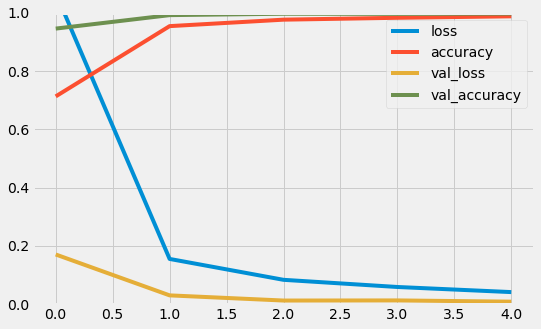

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 6 Loading the Test Data and Running the Predictions

### 6.1 Extracting Labels and Image Paths

In [27]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

### 6.2 Processing Images

* Iterates over each image path in imgs.
* Each image is read, converted to RGB, resized to (IMG_HEIGHT, IMG_WIDTH), and then appended to the data list. If there's an error in processing an image, it prints an error message.

In [28]:
data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)

### 6.3 Preparing Test Dataset

* Converts the data list to a NumPy array (X_test), creating the test dataset.
* Normalizes the pixel values of the images by dividing by 255 (since RGB values range from 0 to 255).

In [29]:
X_test = np.array(data)
X_test = X_test/255

### 6.4 Making Predictions

In [30]:
pred = model.predict_classes(X_test)

### 6.5 Evaluating Model Accuracy

* Compares the predicted classes (pred) with the actual labels (labels) to compute the model's accuracy on the test data.
* Prints the accuracy as a percentage.

In [31]:
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  97.30007917656374


## 7 Analysis

### 7.1 Visualizing the Confusion Matrix

The heatmap visualization of the confusion matrix provides a clear and informative view of the model's performance across different classes. It shows where the model is confusing one class for another, which is particularly useful for multiclass classification problems.

* Computes the confusion matrix (cf) using the true labels (labels) and the predictions made by the model (pred).
* In a confusion matrix, each row represents the instances of an actual class, while each column represents the instances of a predicted class.

In [32]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

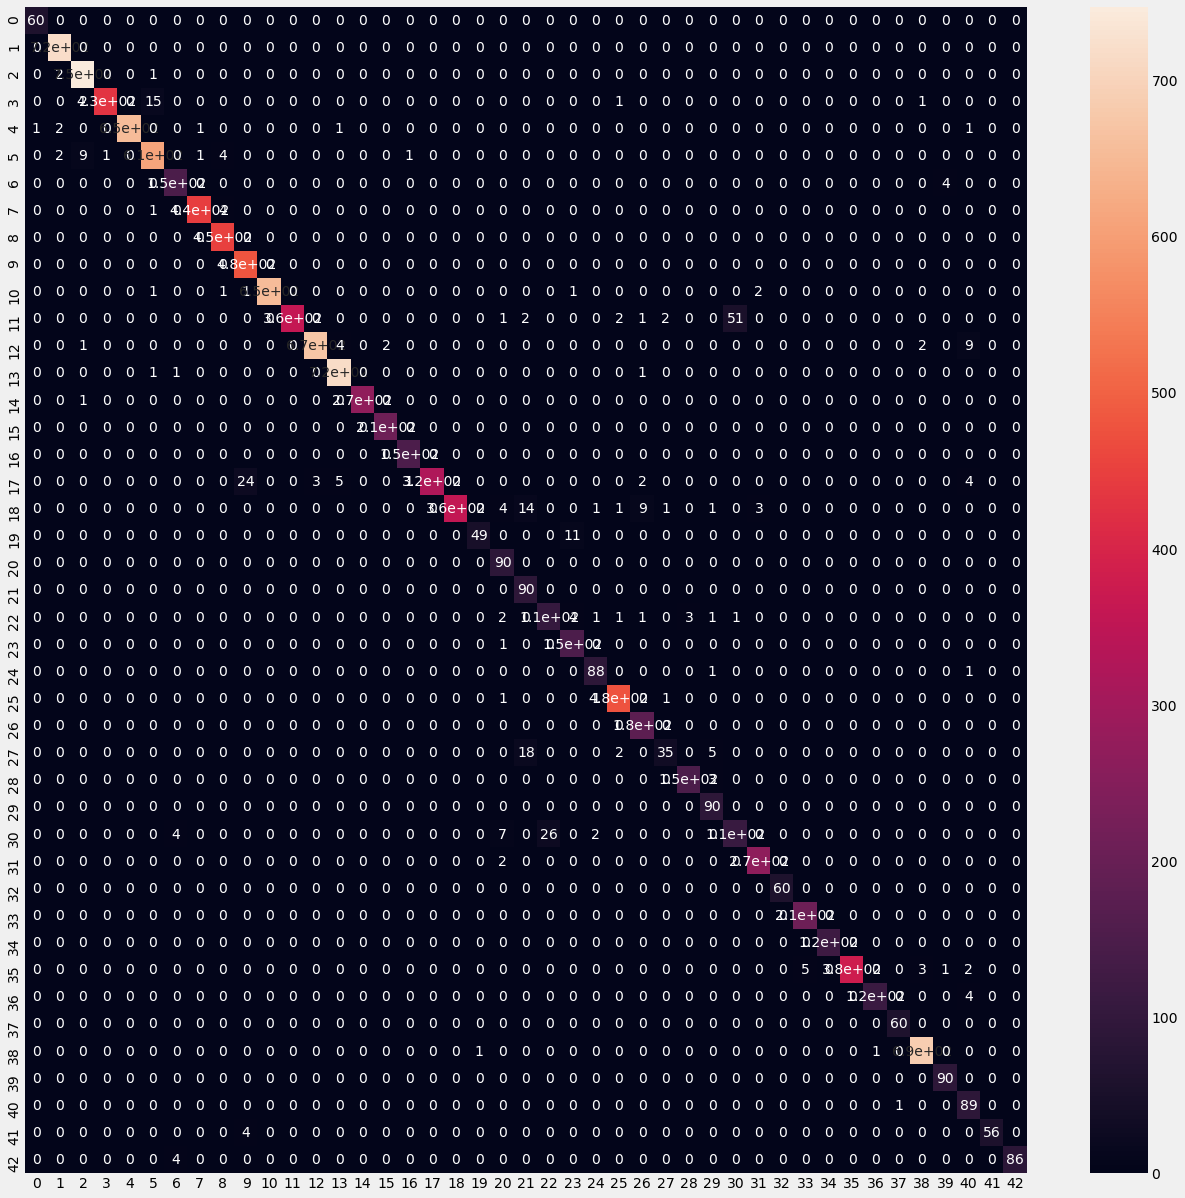

In [33]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

### 7.2 Classification report

The report includes several key metrics for each class:
* Precision: The accuracy of positive predictions for each class.
* Recall: The ability of the classifier to find all the positive instances per class.
* F1-Score: A weighted harmonic mean of precision and recall. The best value is 1 and the worst is 0.
* Support: The number of actual occurrences of each class in the specified dataset.

In [34]:
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.99      1.00      1.00       720
           2       0.98      1.00      0.99       750
           3       1.00      0.96      0.98       450
           4       1.00      0.99      1.00       660
           5       0.97      0.97      0.97       630
           6       0.94      0.97      0.96       150
           7       1.00      0.99      0.99       450
           8       0.98      1.00      0.99       450
           9       0.94      1.00      0.97       480
          10       1.00      0.99      1.00       660
          11       1.00      0.86      0.92       420
          12       1.00      0.97      0.98       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.99      1.00      1.00       210
          16       0.99      1.00      0.99       150
          17       1.00    

## 8. Predictions on Test Data

### 8.1 Random Predictions on Test Data

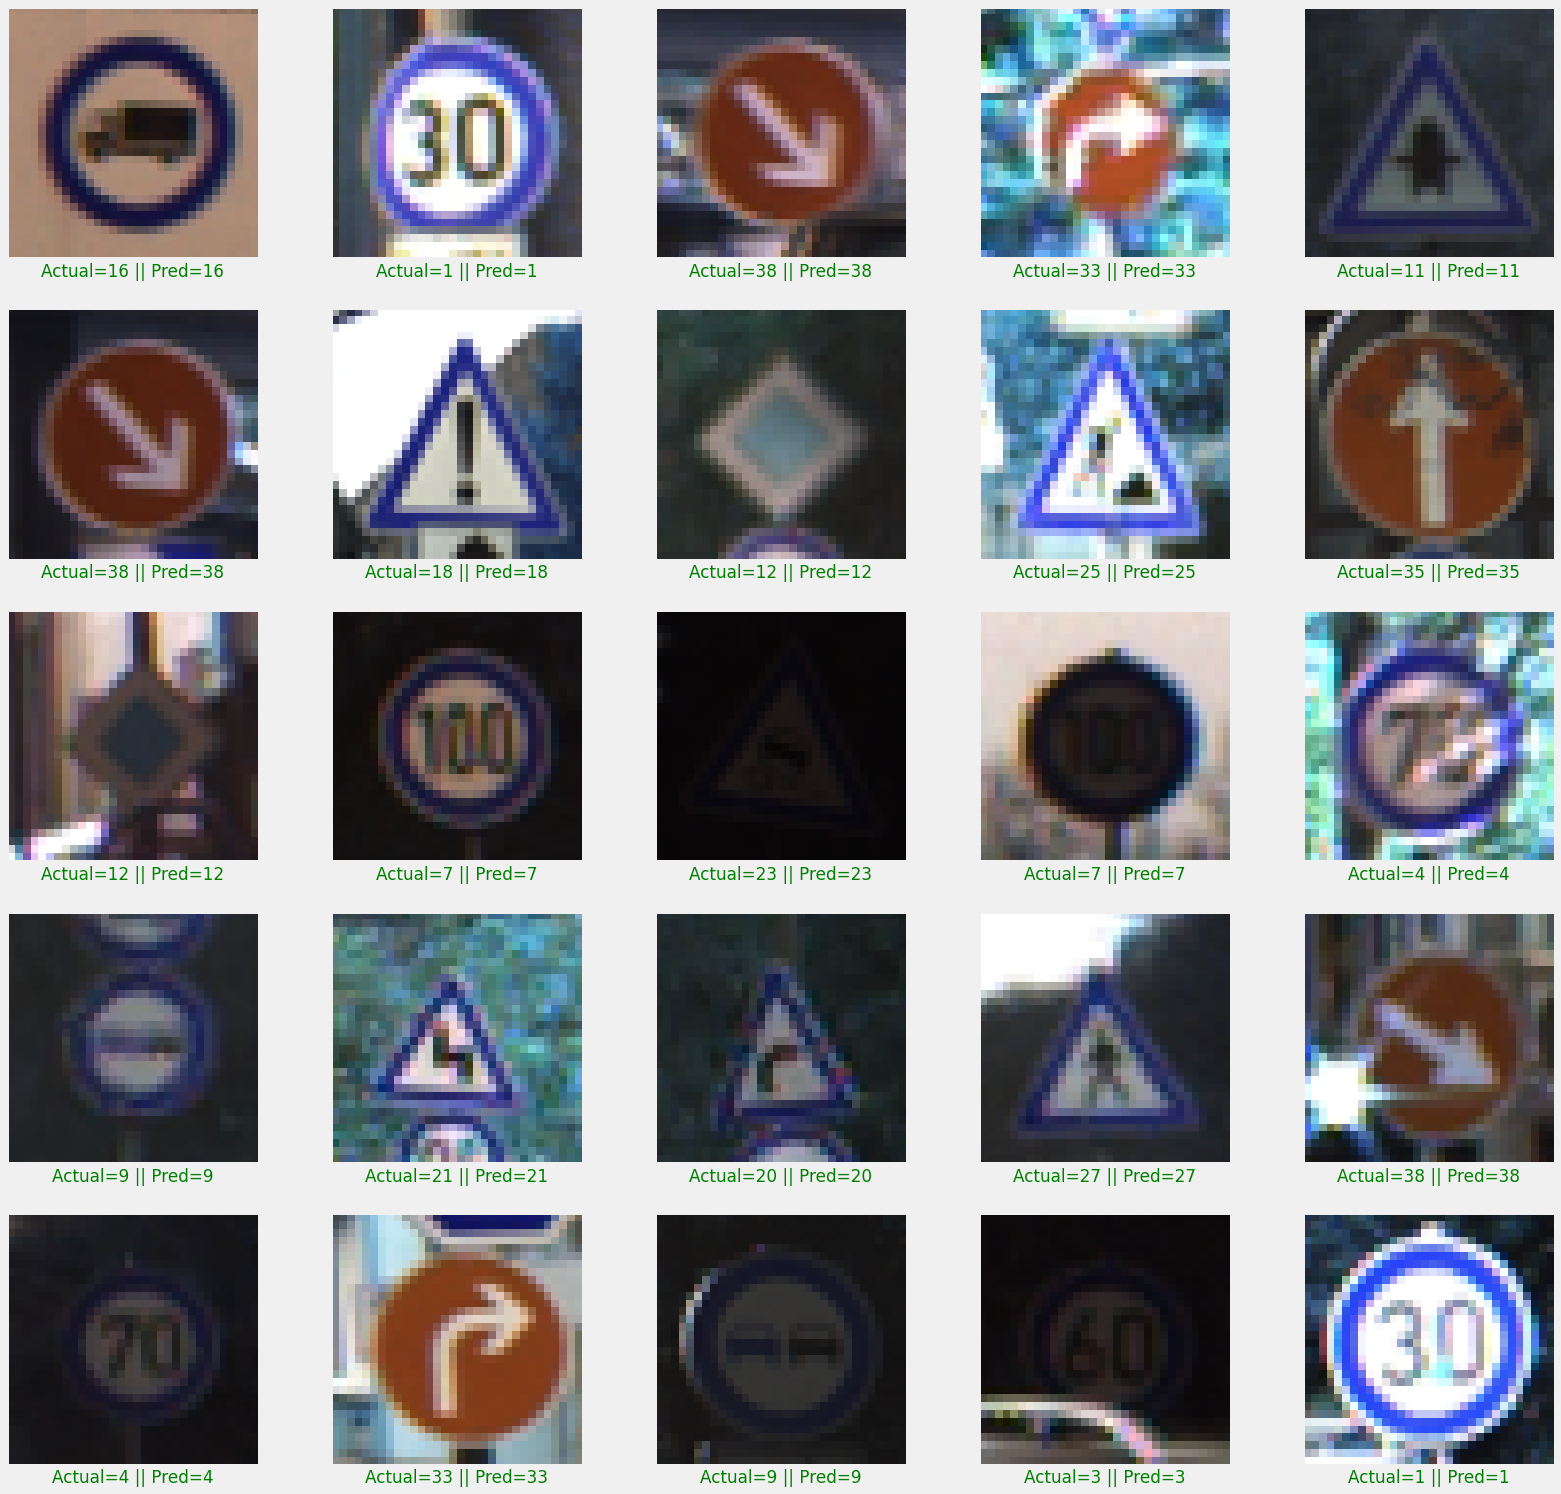

In [35]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

### 8.2 Wrong Predictions on Test Data

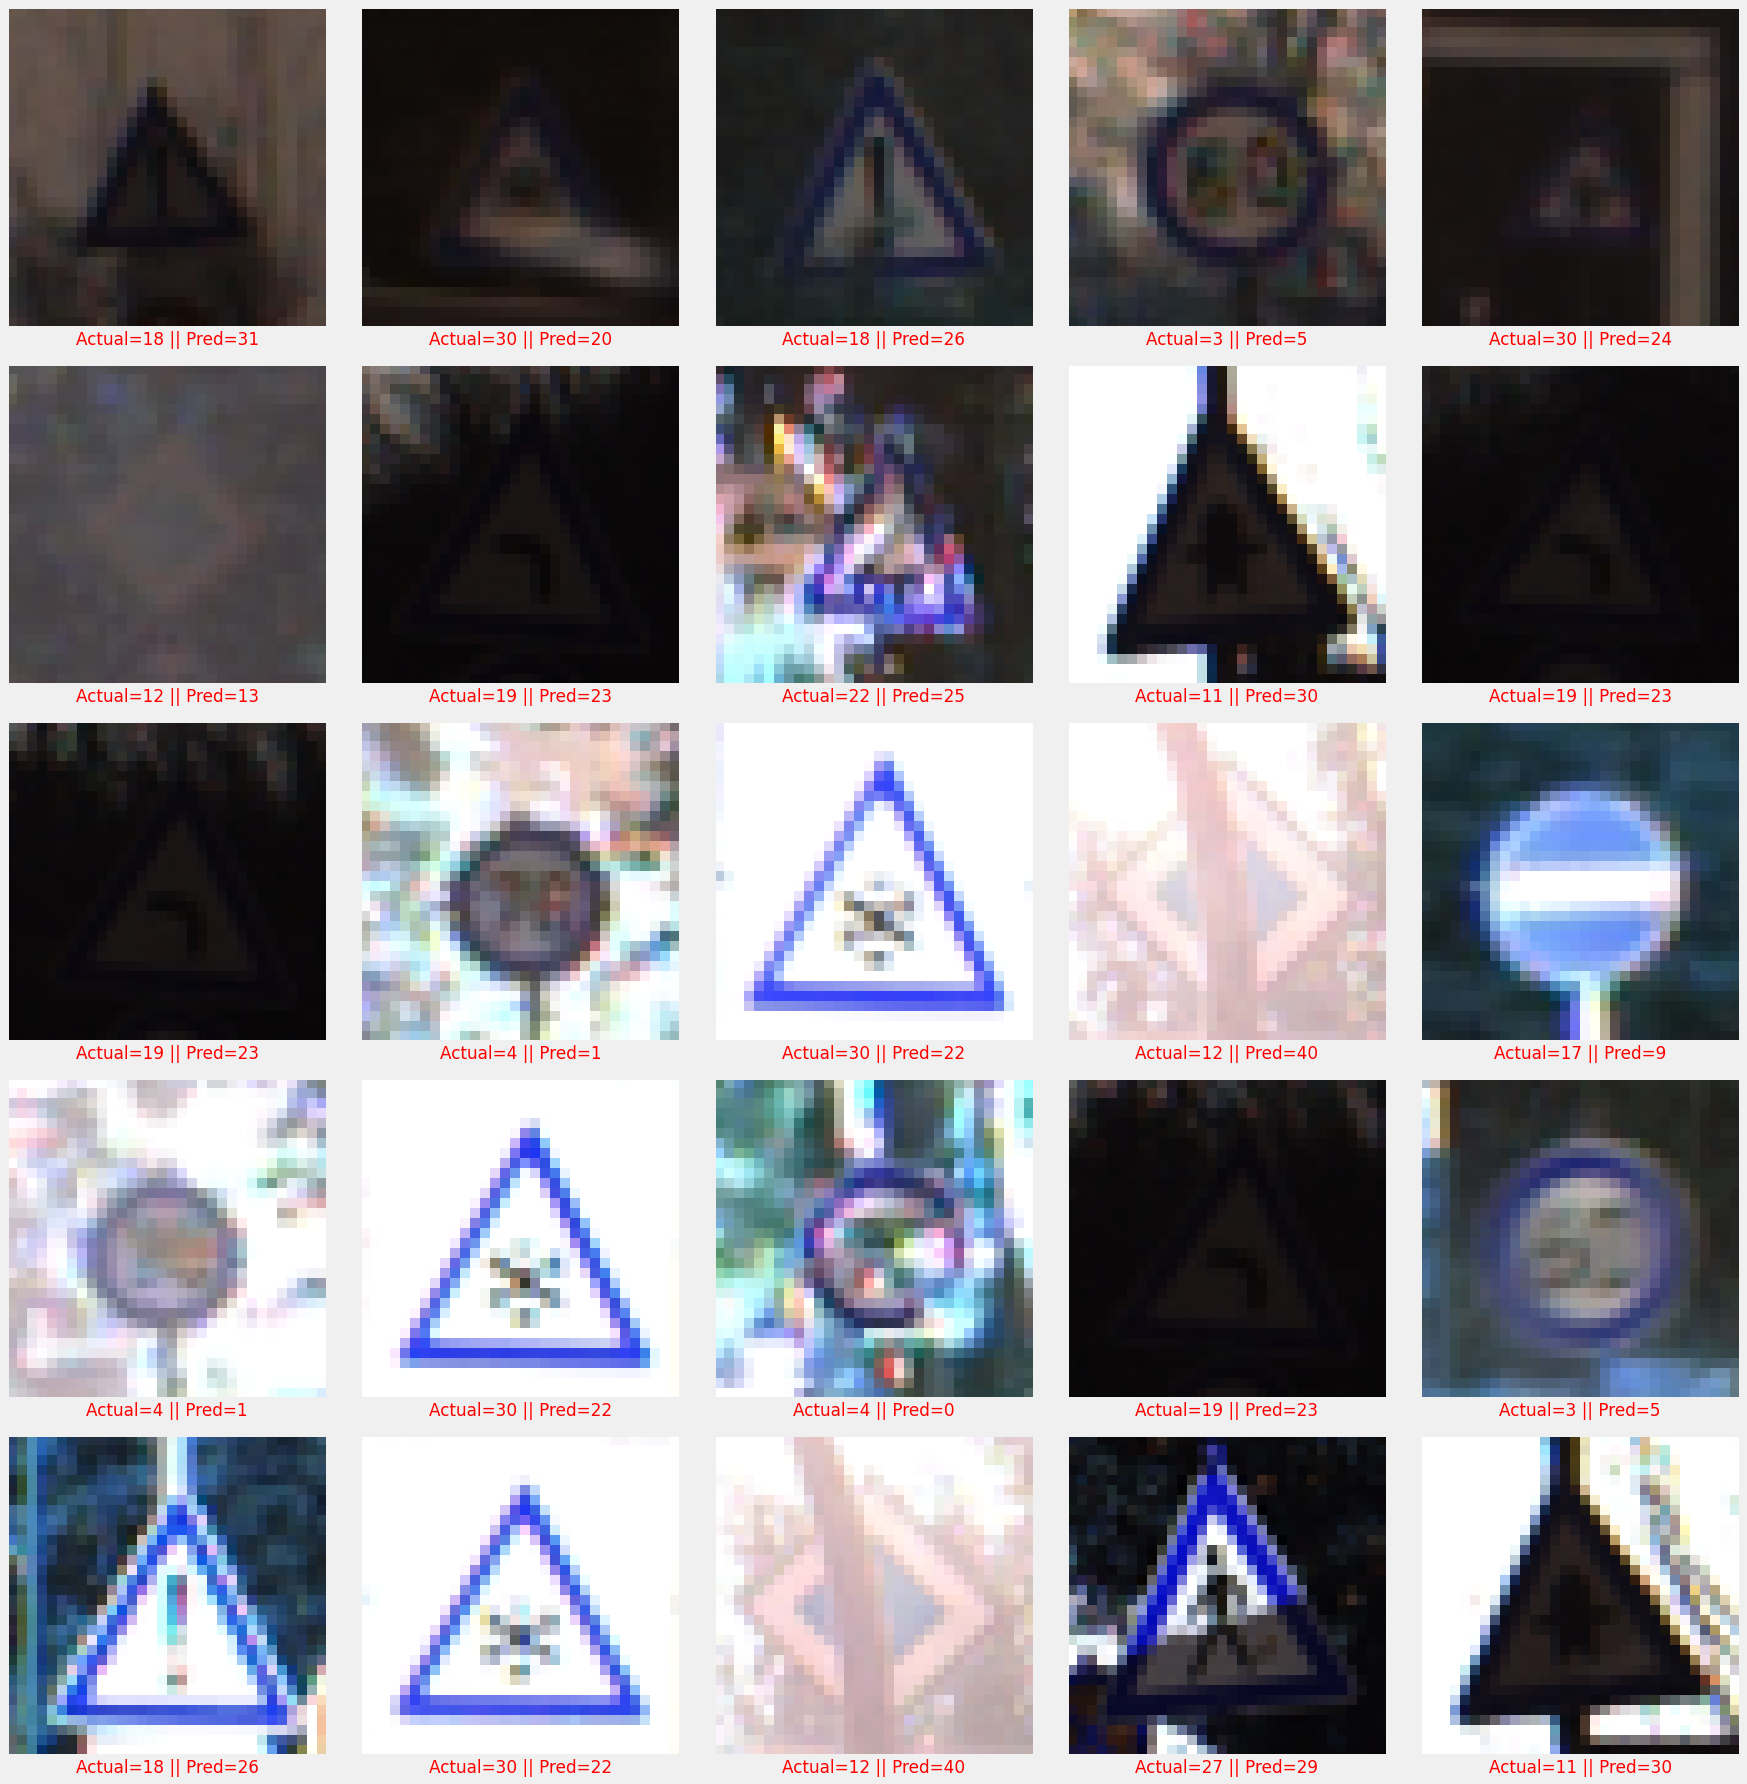

In [36]:
import matplotlib.pyplot as plt

# Assuming X_test contains the test images, pred contains model predictions, and labels contains true labels
plt.figure(figsize=(25, 25))

misclassified_indexes = [i for i in range(len(pred)) if pred[i] != labels[i]]
num_plots = min(len(misclassified_indexes), 25)  # Display up to 25 misclassified images

for i in range(num_plots):
    index = misclassified_indexes[i]
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[index]
    actual = labels[index]
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color='r')
    plt.imshow(X_test[index])
plt.tight_layout()
plt.show()

# SVM

## 1. Initialization

In [37]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn import svm
import time

## 2. Resizing images to fit SVM

.resize(39209,3072): This method is used to change the shape of the image_data array. The new shape is specified by the arguments (39209, 3072).

* 39209: This is the new number of rows in the array. If image_data represents images, each row could represent a different image.
* 3072: This is the new number of columns. In the context of image data, this could represent the number of pixels or features per image. For instance, if these are color images with 32x32 pixels and each pixel is represented by 3 values (Red, Green, Blue), then each image would have 32 * 32 * 3 = 3072 features.

In [38]:
image_data.resize(39209,3072)
X_test.resize(12630,3072)

## 3. Normaliazing data for SVM

In [39]:
image_data = preprocessing.scale(image_data)
X_test = preprocessing.scale(X_test)

## 4. Creating blank dataframe to store model scores

In [40]:
df_scores  = pd.DataFrame(columns = ['Model', 'Score', 'Value'])
df_model = pd.DataFrame(columns = ['Model','Accuracy (%)','Time (mins)'])

## 5. Defining SVM model

The code snippet is creating an instance of a Support Vector Machine (SVM) classifier using the `NuSVC` class from the `svm` module. Here's a breakdown of what each part of the code does:

- `svm_clf =`: This creates a variable named `svm_clf` and assigns the newly created `NuSVC` object to it. This variable will be used to refer to the SVM classifier.

- `svm.NuSVC()`: This is the constructor for the `NuSVC` class. `NuSVC` stands for Nu-Support Vector Classification, which is a type of SVM. The `NuSVC` class is part of the `svm` module in a library like scikit-learn, which is a popular machine learning library in Python.

- `nu=0.05`: This parameter sets the value of `nu` in the `NuSVC` classifier. The `nu` parameter is an upper bound on the fraction of margin errors (points that are on the wrong side of the margin) and a lower bound of the fraction of support vectors. In this case, `nu` is set to 0.05, meaning the model aims to have at most 5% margin errors and at least 5% support vectors.

- `kernel='rbf'`: This specifies the kernel type to be used in the algorithm. The `rbf` stands for Radial Basis Function, a common kernel used in SVMs. It's useful for non-linear data, as it can map the inputs into higher-dimensional space where they might be linearly separable.

- `gamma=0.00001`: The `gamma` parameter defines how far the influence of a single training example reaches. Low values of `gamma` mean ‘far’ and high values mean ‘close’. In this case, a very low gamma value is used, which implies a large radius for the decision boundary, leading to more points being considered close.

- `random_state=121`: This is a seed for the random number generator. Using a fixed `random_state` ensures that the results are reproducible. This is useful for debugging or for scientific studies where reproducibility is important. The number `121` is arbitrary; any integer can be used as a seed.

In [41]:
svm_clf = svm.NuSVC(nu=0.05,kernel='rbf',gamma=0.00001,random_state=121)

## 6. Fitting SVM

The provided code snippet measures the training time of an SVM classifier on an image dataset using Python's `time.perf_counter()`. It starts a timer (`tic`), trains the SVM classifier (`svm_clf.fit(image_data, image_labels)`), and stops the timer (`toc`). The training duration is calculated in minutes and seconds (`m_svm, s_svm = divmod((toc - tic), 60)`) and then formatted into a float representing minutes and seconds (`time_svm=float(str(str(int(m_svm))+"."+str(int(m_svm))))`). 

In [ ]:
tic = time.perf_counter()

svm_clf.fit(image_data, image_labels)

toc = time.perf_counter()
m_svm, s_svm = divmod((toc - tic), 60)
time_svm=float(str(str(int(m_svm))+"."+str(int(m_svm))))

## 7. Predicting values for test data
The code `y_pred_svm = svm_clf.predict(X_test)` is a line of Python code typically found in the context of machine learning, particularly in classification tasks using Support Vector Machines (SVM). Let's break down this code:

- `svm_clf`: This variable represents a trained Support Vector Machine classifier. It is an instance of an SVM model that has been previously trained (fitted) on a dataset. The training process involves the model learning to classify data points based on the features and labels it was trained on.

- `.predict(X_test)`: This is a method call on the SVM classifier. The `predict` method is used to perform classification on new, unseen data. Here, `X_test` is passed as an argument to the `predict` method. `X_test` typically represents the feature set of the test dataset. This dataset is used to evaluate the performance of the model; it contains data points that were not used during the training phase of the model.

- `y_pred_svm`: The result of the `predict` method is assigned to this variable. `y_pred_svm` will contain the predicted labels or outputs for each data point in `X_test`. These predictions are made based on the learning from the training phase. The predicted labels in `y_pred_svm` can then be compared to the actual labels of the test dataset to evaluate the accuracy and performance of the SVM classifier.

In [ ]:
y_pred_svm = svm_clf.predict(X_test)

## 8. Calculating recall, precision, f1 score and accuracy of SVM

This code snippet evaluates the performance of a Support Vector Machine (SVM) classifier using various metrics and stores these results in two dataframes.

### Metrics Calculated
1. **Recall**: The macro-average recall score is calculated and stored in `df_scores`.
2. **Precision**: The macro-average precision score is calculated and stored in `df_scores`.
3. **F1 Score**: The macro-average F1 score is calculated and stored in `df_scores`.
4. **Accuracy**: The overall accuracy of the classifier is calculated and stored in `df_scores`.

### Dataframes Updated
- `df_scores`: Stores the performance metrics (Recall, Precision, F1 Score, Accuracy) for the SVM classifier.
- `df_model`: Stores the accuracy (as a percentage) and the computation time (`time_svm`) for the SVM classifier.

### Code Functionality
- The code uses functions from the `metrics` module to calculate each performance metric.
- Each metric is appended to the `df_scores` dataframe as a new row.
- The `df_model` dataframe is updated with the accuracy percentage and the model's computation time.

In [ ]:
recall_svm = metrics.recall_score(labels, y_pred_svm,average='macro')
df_scores.loc[len(df_scores)] = ["SVM","Recall",recall_svm]

precision_svm = metrics.precision_score(labels, y_pred_svm,average='macro')
df_scores.loc[len(df_scores)] = ["SVM","Precision",precision_svm]

f1_svm = metrics.f1_score(labels, y_pred_svm,average='macro')
df_scores.loc[len(df_scores)] = ["SVM","F1",f1_svm]

acc_svm=metrics.accuracy_score(labels,y_pred_svm)
df_scores.loc[len(df_scores)] = ["SVM","Accuracy",acc_svm]

df_model.loc[len(df_model)] = ["SVM",acc_svm*100,time_svm]
acc_svm

## 9. Classification report for SVM

In [ ]:
print("Classification report for SVM classifier %s:\n%s\n"
      % (svm_clf, metrics.classification_report(labels, y_pred_svm)))

## 10. Confusion Matrix

In [ ]:
cf = confusion_matrix(labels, y_pred_svm)

df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)